In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
acceleration_g = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Acceleration_with_g_dataframe.csv')
acceleration_no_g = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/acceleration_witout_g.csv')
chirp = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Chirp.csv')
collision = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Collision_dataframe.csv')
echo = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Echo.csv')
gps = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/GPS_dataframe.csv')
gyroscope = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/gyroscope.csv')
sound_speed = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/SpeedOfSound.csv')

In [112]:
echo.isna().sum()

Distance (cm)                            0
Crosscorrelation (a.u.)              10360
Normalized CC (a.u.)                  2400
Crosscorrelation history 1 (a.u.)     8113
Normalized CC history 1 (a.u.)           0
Crosscorrelation history 2 (a.u.)     7272
Normalized CC history 2 (a.u.)        1200
Crosscorrelation history 3 (a.u.)     9569
Normalized CC history 3 (a.u.)        2400
Crosscorrelation history 4 (a.u.)     7134
Normalized CC history 4 (a.u.)        1200
Crosscorrelation history 5 (a.u.)    10225
Normalized CC history 5 (a.u.)        2400
Type                                     0
Count                                    0
dtype: int64

/Users/carokluin/anaconda3/envs/ML4QS_project_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 3000x2400 with 0 Axes>

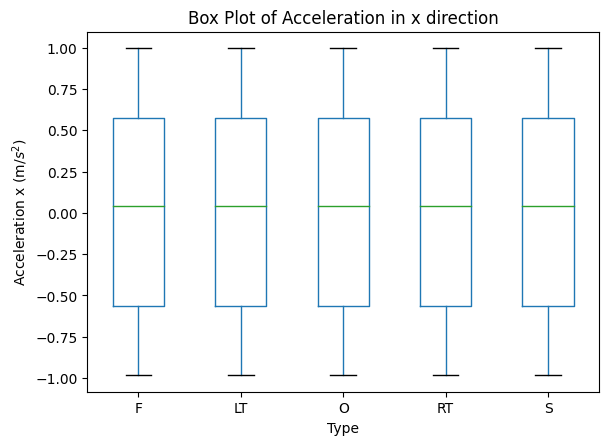

In [100]:
# Box plot
plt.figure(figsize=(10, 8), dpi=300)
chirp.boxplot(column='Amplitude (a.u.)', by='Type', grid=False)
plt.title('Box Plot of Acceleration in x direction')
plt.suptitle('')  # Suppress the default title to only show custom title
#plt.xlabel('Type')
plt.ylabel('Acceleration x (m/$s^{2}$)')
plt.show()

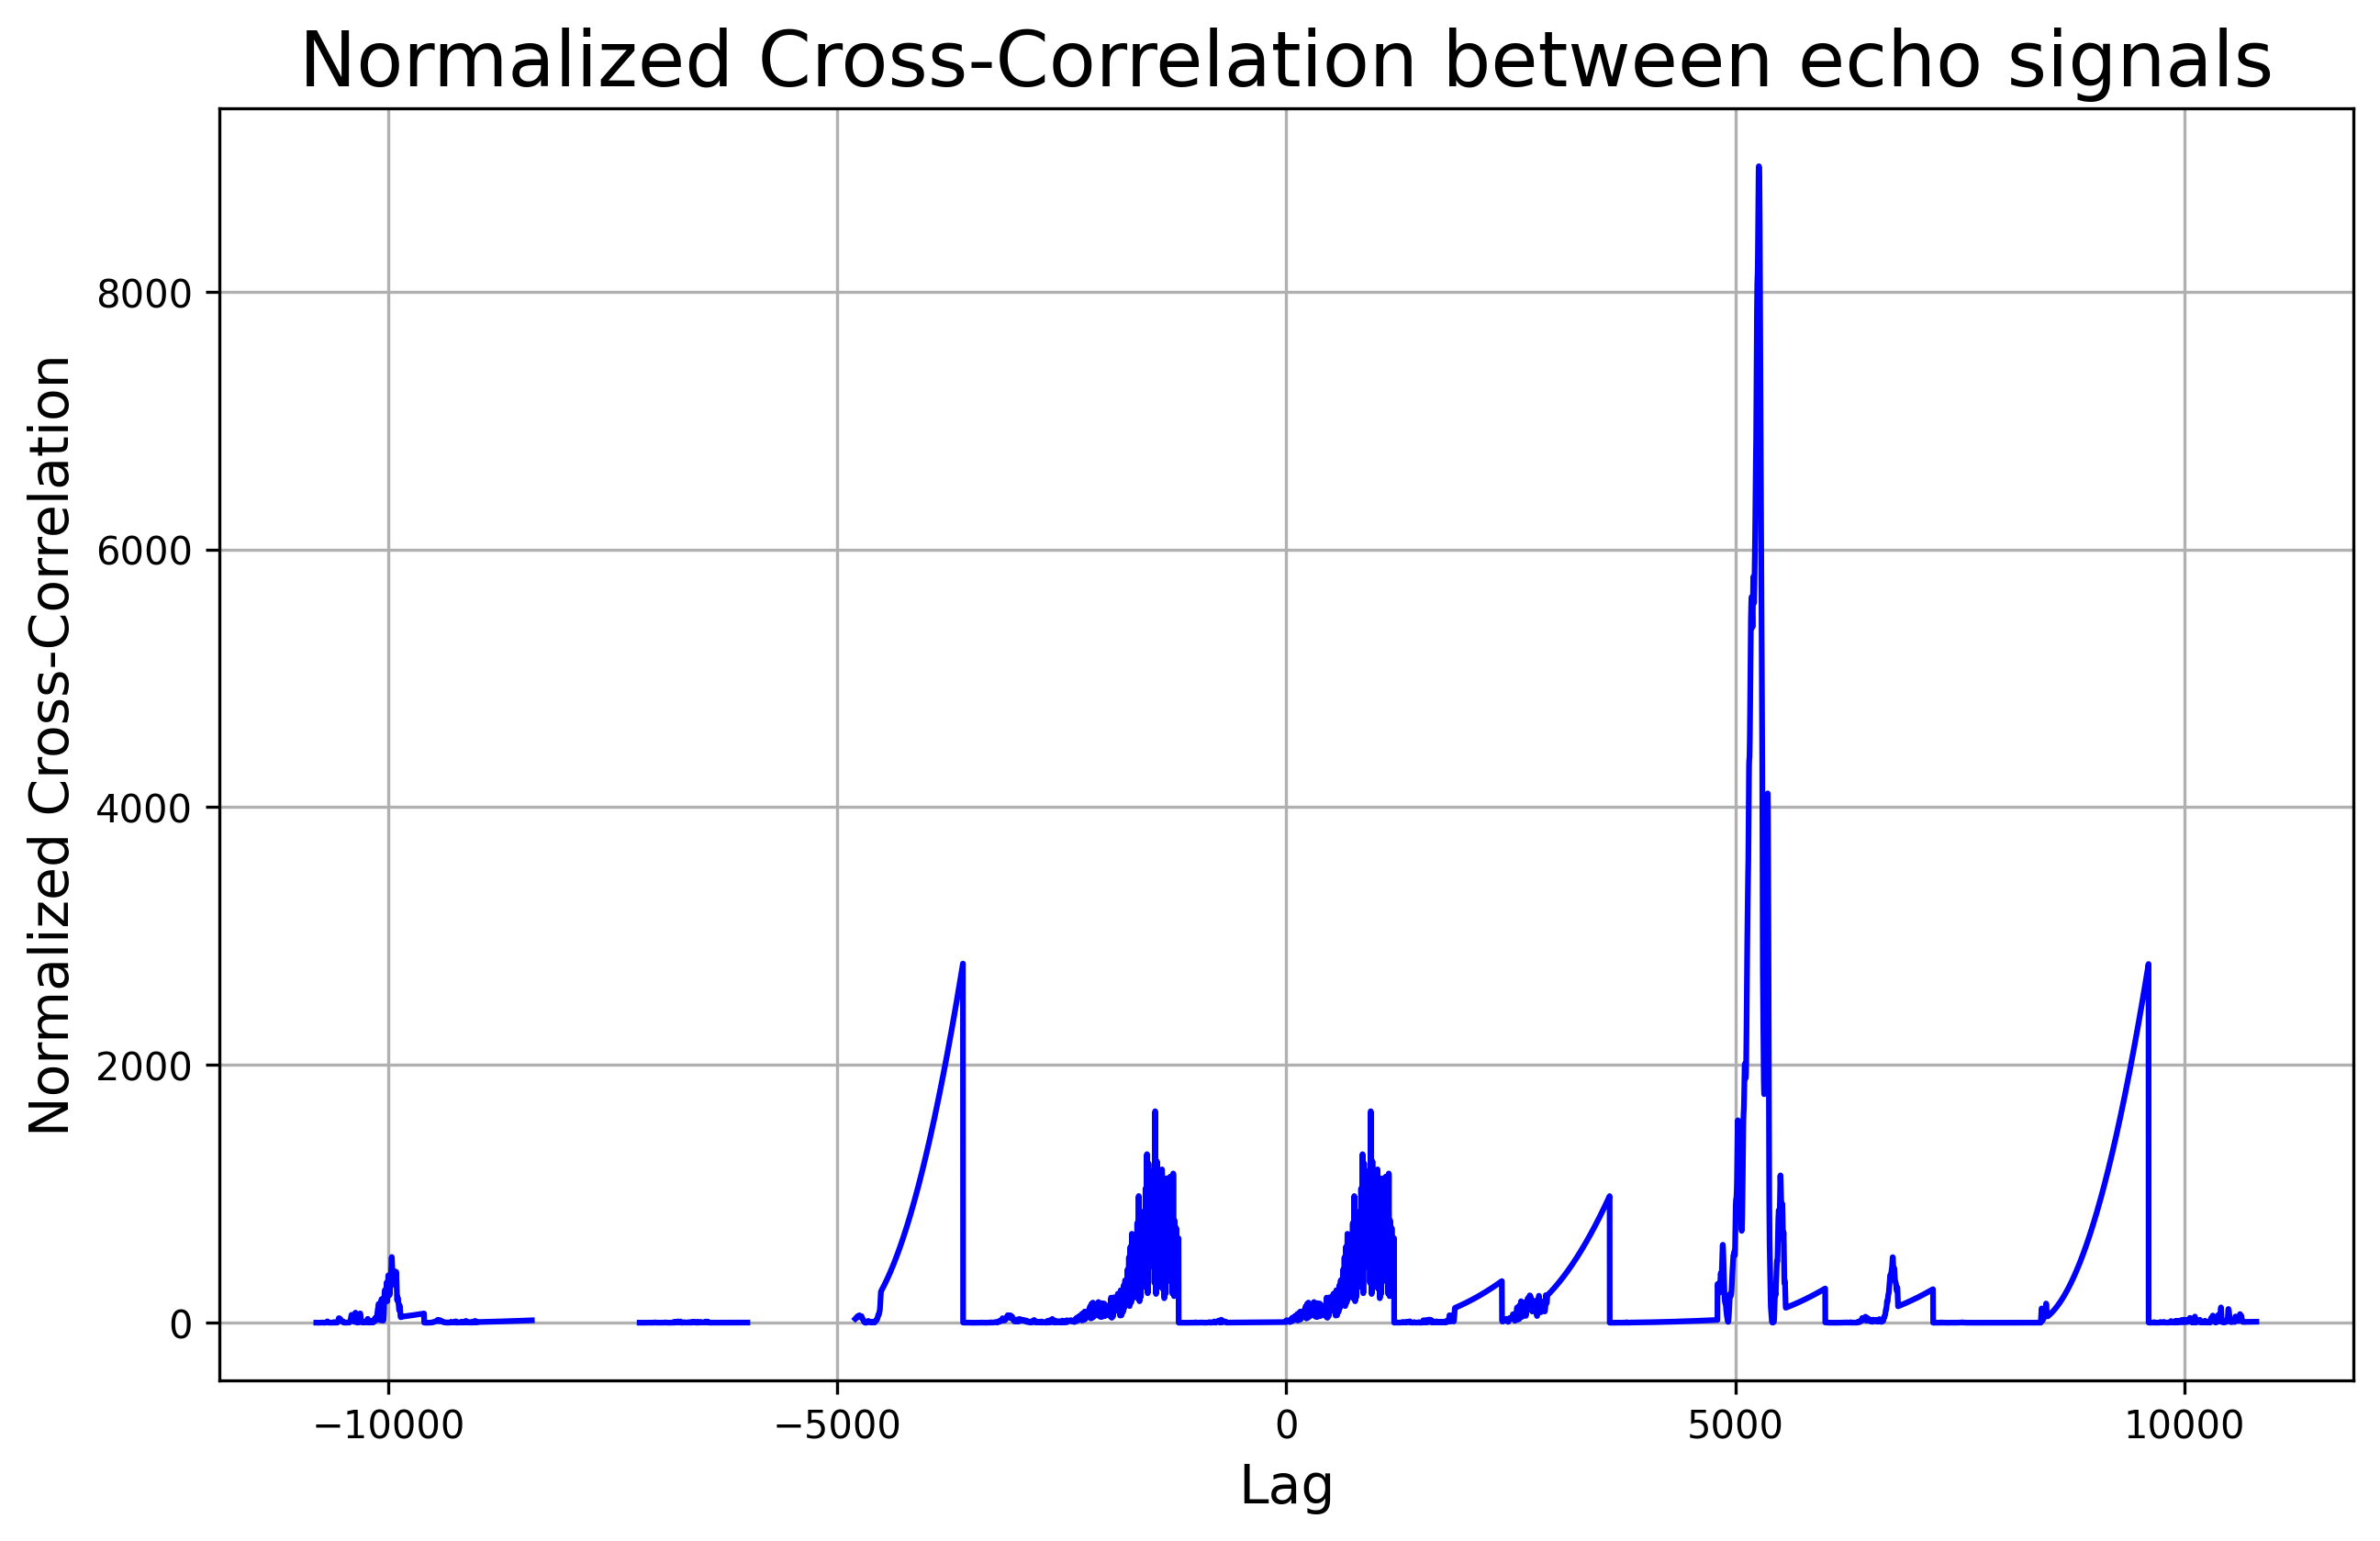

In [99]:
# Load the data
file_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Echo.csv'  # Update with your file path
data = pd.read_csv(file_path)

normalized_cc = data['Normalized CC (a.u.)'].values  # Replace with actual column name

# Generate the lag array
lags = np.arange(-len(normalized_cc) // 2, len(normalized_cc) // 2 + 1)

# Plot the normalized cross-correlation
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(lags[1:], normalized_cc, color='blue')
plt.title('Normalized Cross-Correlation between echo signals', size=20)
plt.xlabel('Lag', size=14)
plt.ylabel('Normalized Cross-Correlation', size=14)
plt.grid(True)
# Save the figure in a specific location
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/normalized_cross_correlation_echo.png'  
plt.savefig(output_path)
plt.show()

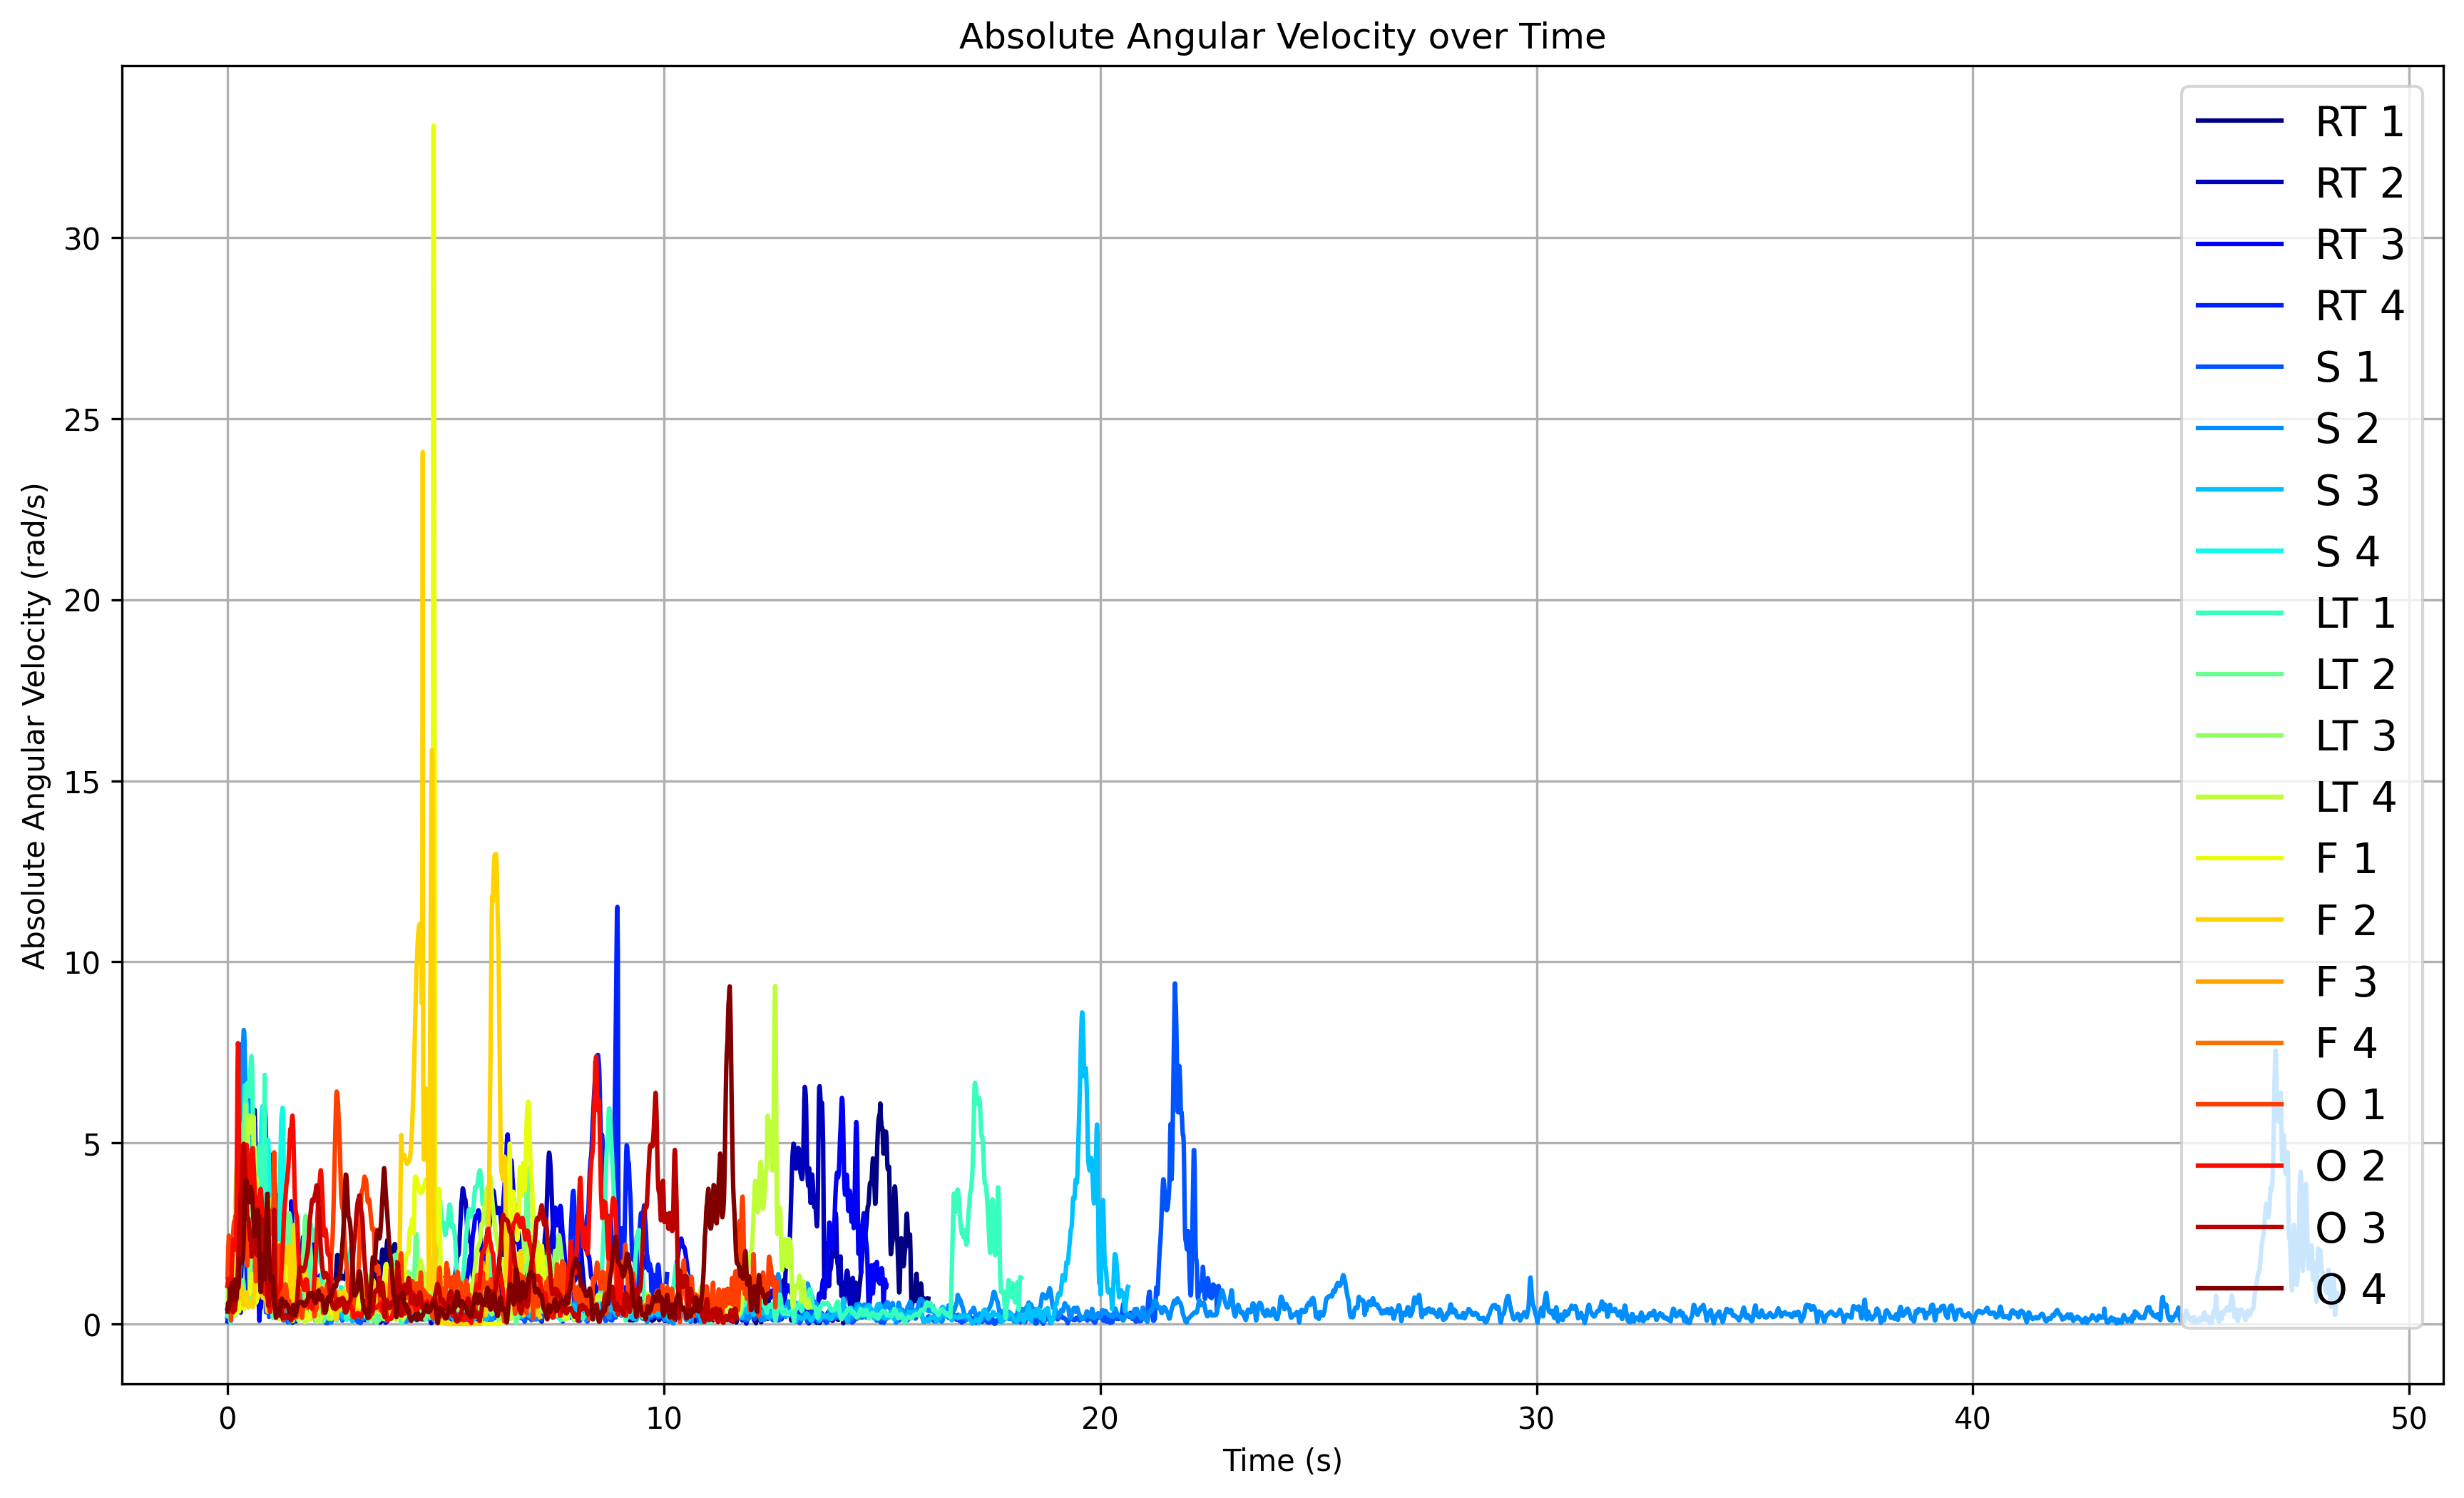

In [86]:
# Define types and counts
types = ['RT', 'S', 'LT', 'F', 'O']
counts = [1, 2, 3, 4]

# Plot the data
plt.figure(figsize=(14, 8), dpi=300)

# Generate unique colors for each type and count combination
colors = plt.cm.jet(np.linspace(0, 1, len(types) * len(counts)))

for idx, t in enumerate(types):
    for c in counts:
        subset = gyroscope[(gyroscope['Type'] == t) & (gyroscope['Count'] == c)]
        color_idx = idx * len(counts) + (c - 1)  # Ensure unique color for each combination
        plt.plot(subset['Time (s)'], subset['Absolute (rad/s)'], label=f'{t} {c}', color=colors[color_idx])

plt.title('Absolute Angular Velocity over Time')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Angular Velocity (rad/s)')
plt.legend(fontsize=14)
plt.grid(True)
# Save the figure in a specific location
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/abs_angular_veloc.png'  
plt.savefig(output_path)
plt.show()

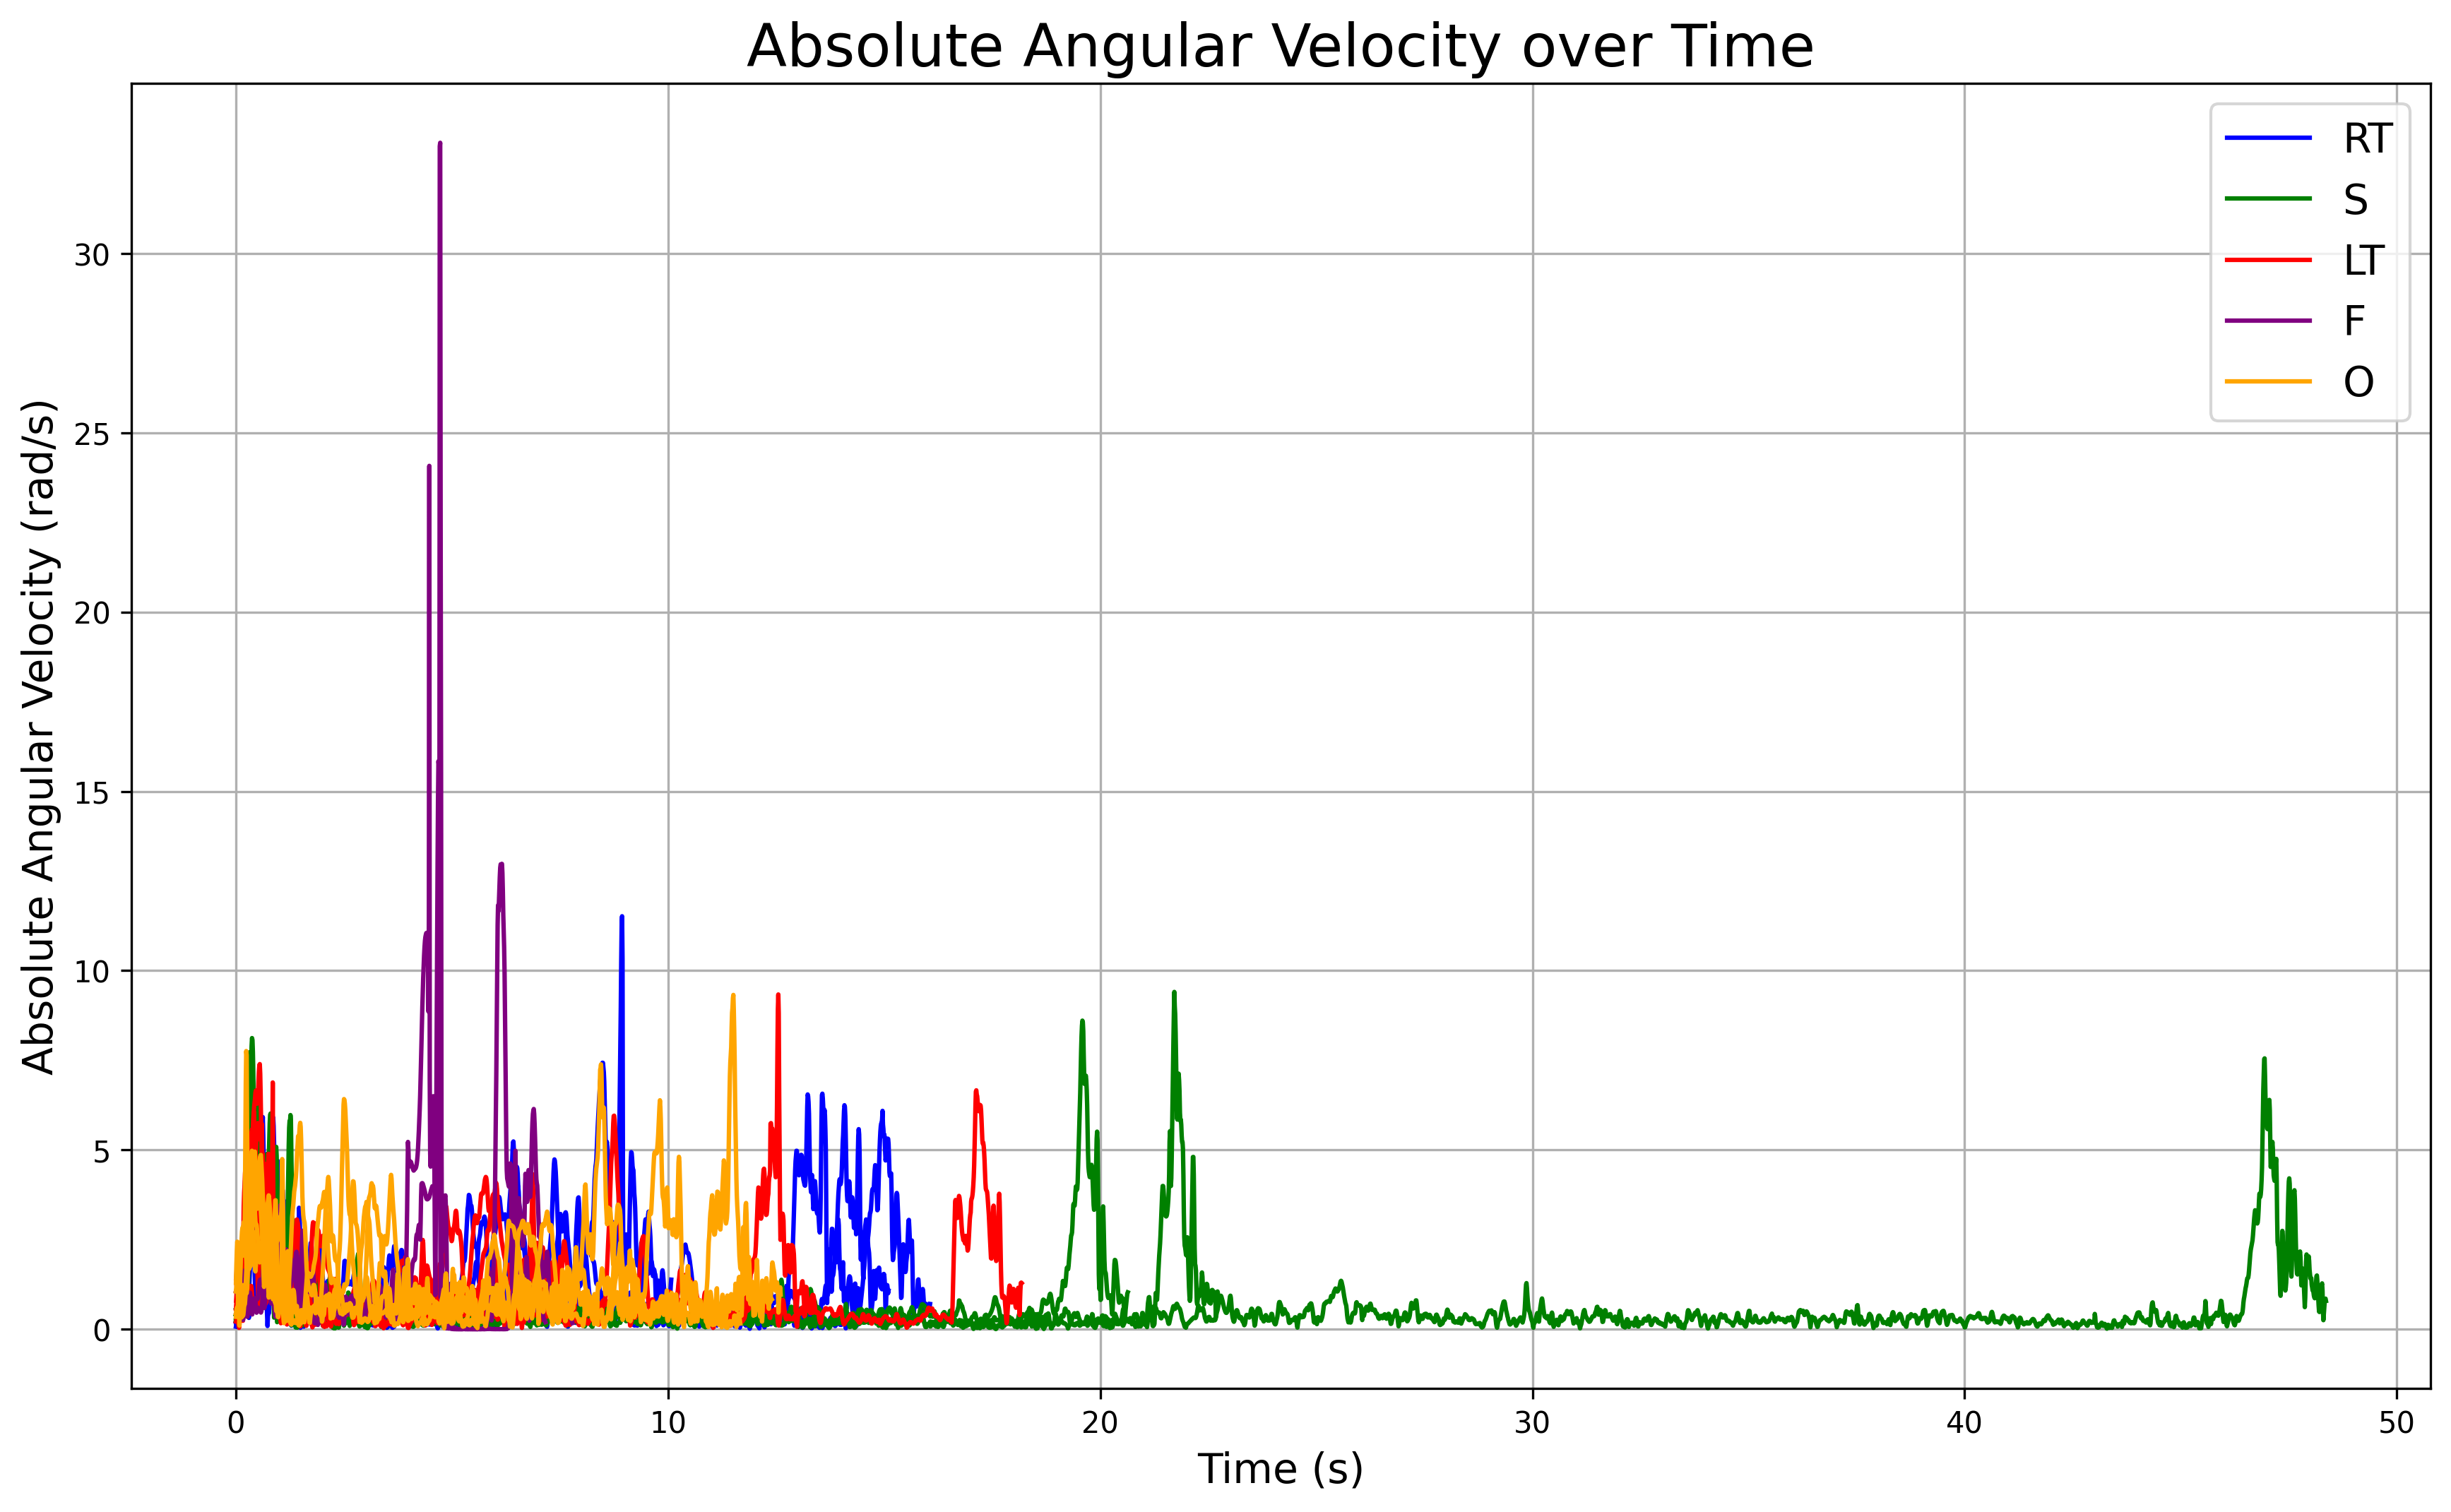

In [101]:
# Define colors for each type
colors = {
    'RT': 'blue',
    'S': 'green',
    'LT': 'red',
    'F': 'purple',
    'O': 'orange'
}

# Define line styles for each count
line_styles = {
    1: '-',
    2: '--',
    3: '-.',
    4: ':'
}

# Plot the data
plt.figure(figsize=(14, 8), dpi=300)
legend_added = set()
for t in types:
    for c in counts:
        subset = gyroscope[(gyroscope['Type'] == t) & (gyroscope['Count'] == c)]
        label = t if t not in legend_added else None
        plt.plot(subset['Time (s)'], subset['Absolute (rad/s)'], label=label, color=colors[t])
        legend_added.add(t)

plt.title('Absolute Angular Velocity over Time', size=20)
plt.xlabel('Time (s)', size=14)
plt.ylabel('Absolute Angular Velocity (rad/s)', size=14)
plt.grid(True)
plt.legend(fontsize=14)
# Save the figure in a specific location
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/abs_angular_veloc.png'  
plt.savefig(output_path)
plt.show()

/Users/carokluin/anaconda3/envs/ML4QS_project_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/Users/carokluin/anaconda3/envs/ML4QS_project_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/Users/carokluin/anaconda3/envs/ML4QS_project_env/lib/python3.8/site-packages/matplotlib/cbook/_

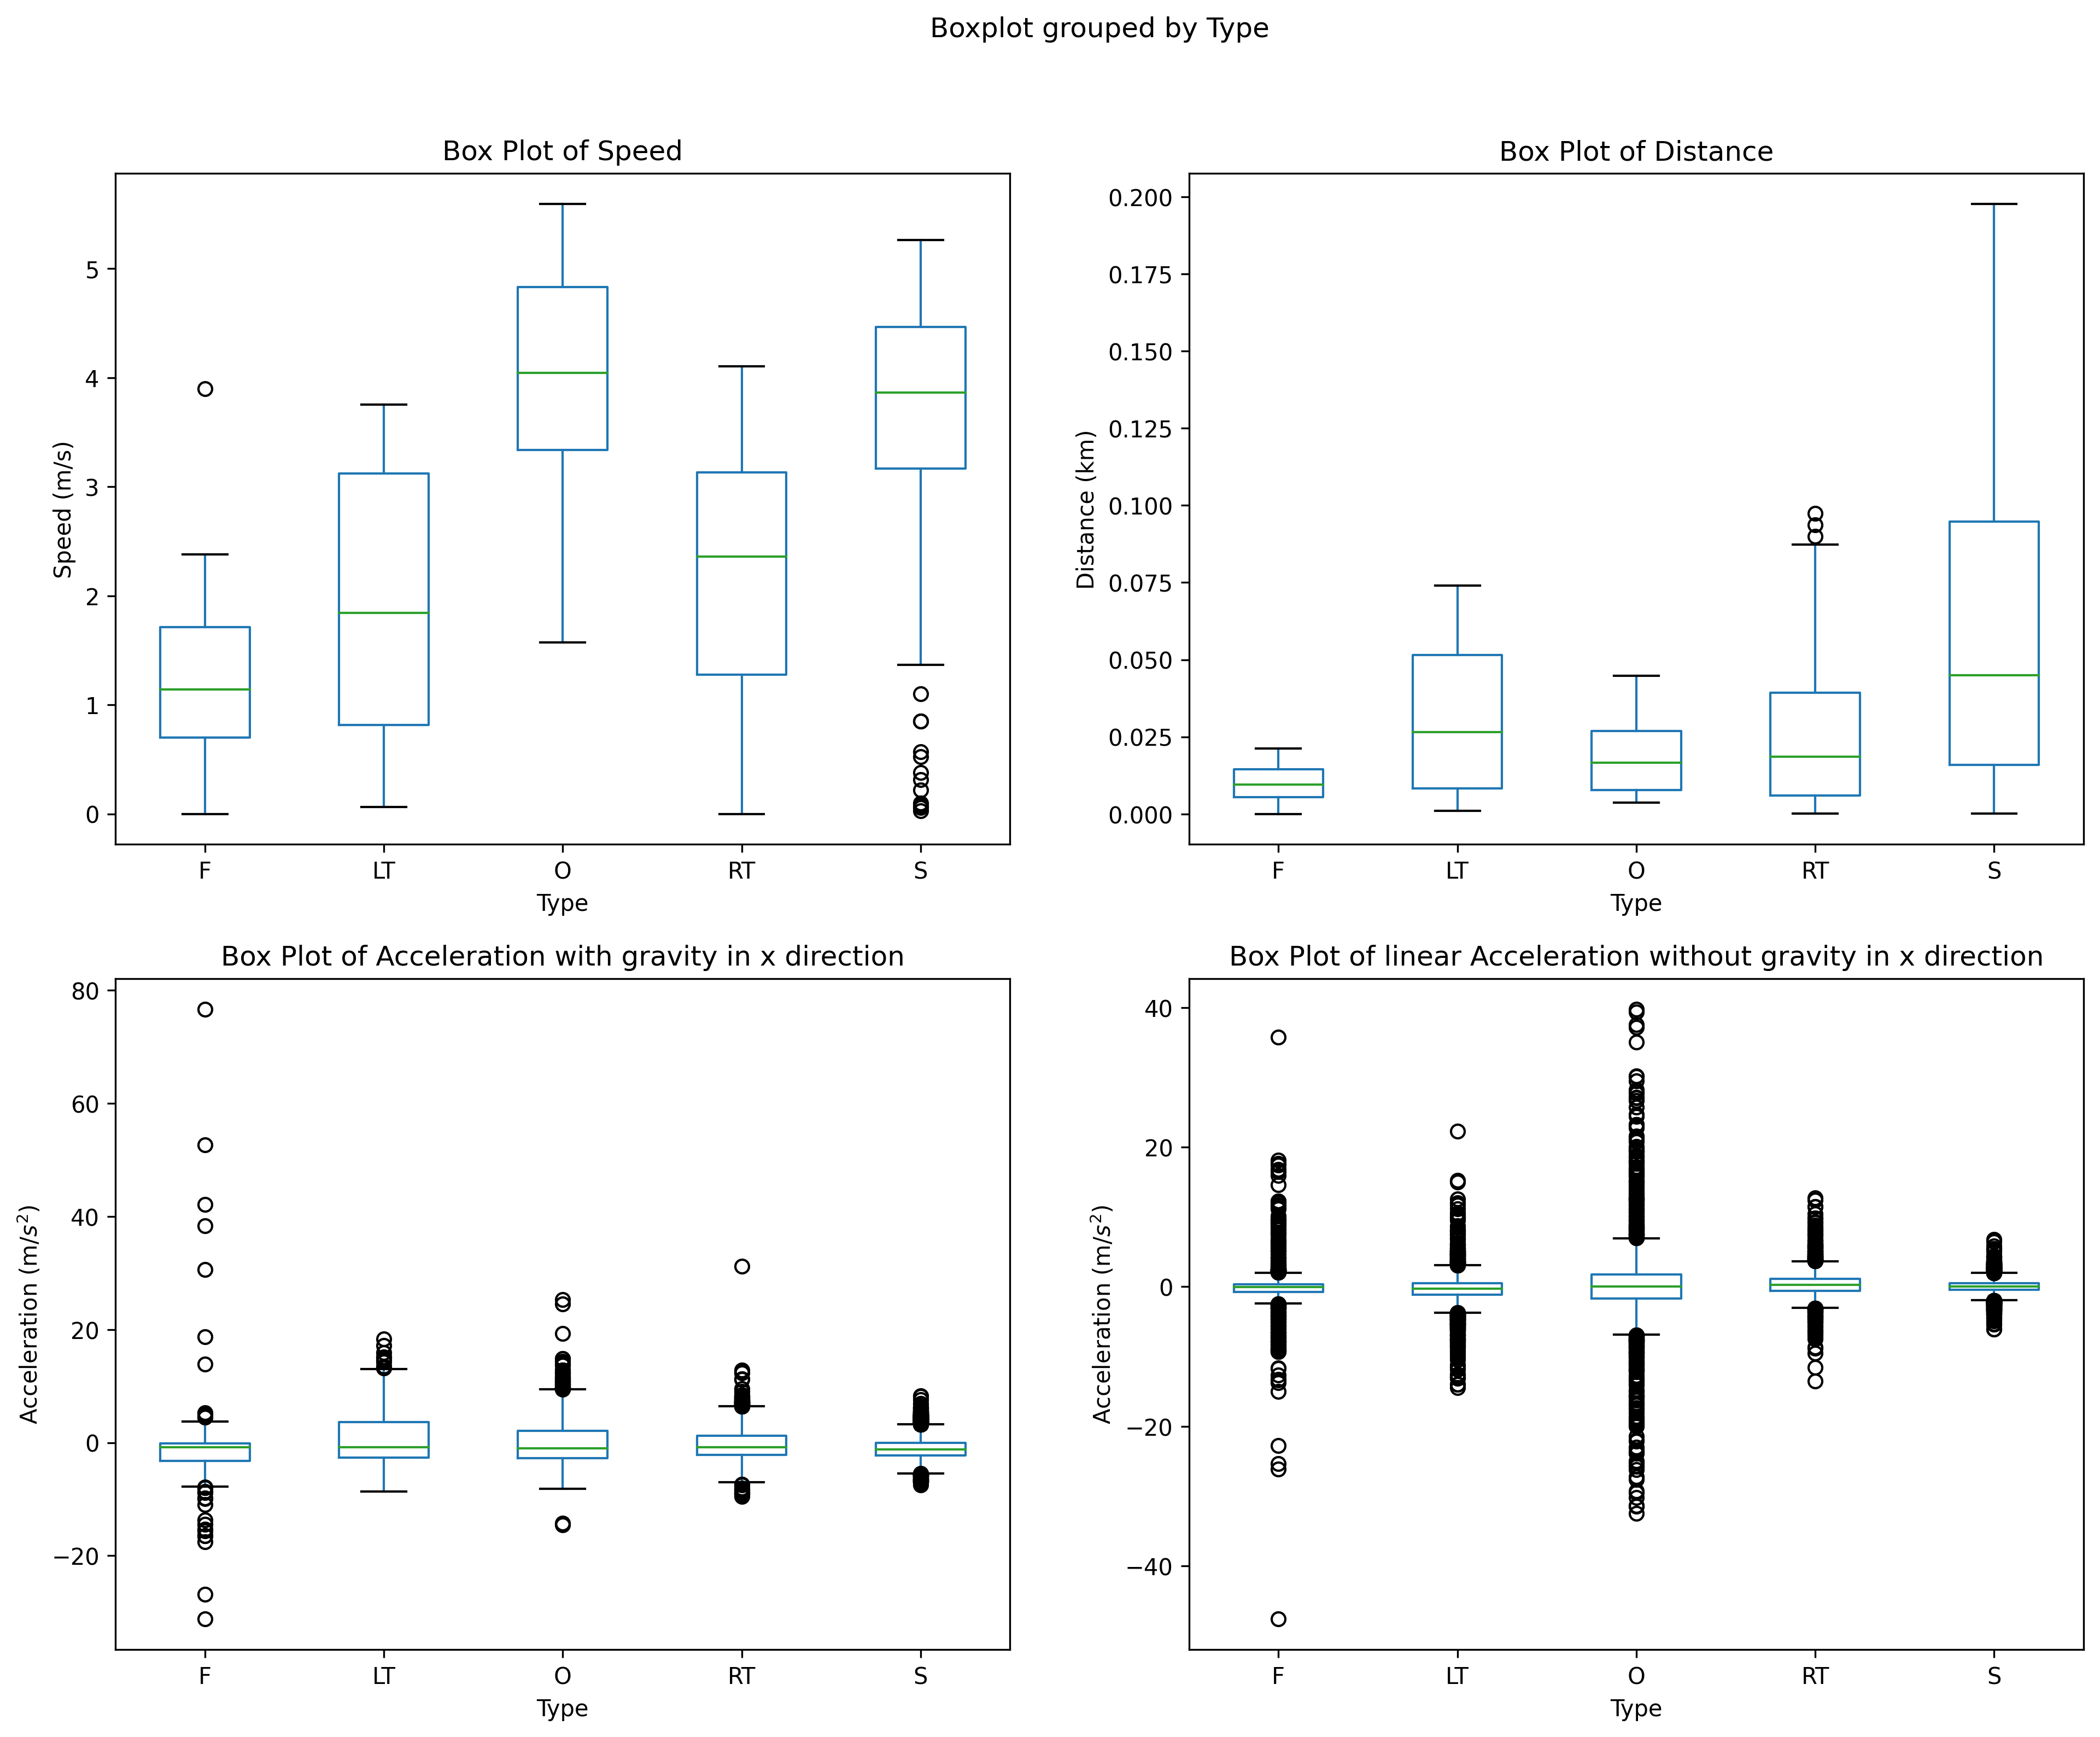

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), dpi=300)
gps.boxplot(column='Speed (m/s)', by='Type', ax=axes[0, 0], grid=False)
axes[0, 0].set_title('Box Plot of Speed')
axes[0, 0].set_ylabel('Speed (m/s)')
#axes[0, 0].set_xlabel('Type')

gps.boxplot(column='Distance (km)', by='Type', ax= axes[0,1],grid=False)
axes[0, 1].set_title('Box Plot of Distance')
axes[0, 1].set_ylabel('Distance (km)')

acceleration_g.boxplot(column='Acceleration x (m/s^2)', by='Type', ax=axes[1,0], grid=False)
axes[1,0].set_title('Box Plot of Acceleration with gravity in x direction')
axes[1,0].set_ylabel('Acceleration (m/$s^{2}$)')

acceleration_no_g.boxplot(column='Linear Acceleration x (m/s^2)', by='Type', ax=axes[1,1], grid=False)
axes[1,1].set_title('Box Plot of linear Acceleration without gravity in x direction')
axes[1,1].set_ylabel('Acceleration (m/$s^{2}$)')

# Save the figure in a specific location
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/boxplots_explor.png'  
plt.savefig(output_path)
plt.show()

In [14]:
gps.describe()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,Count
count,242.000000,242.000000,242.000000,242.000000,242.000000,235.000000,235.000000,225.000000,242.000000,242.000000,242.0,242.000000
mean,10.213743,52.344765,4.900735,0.640207,43.333802,2.720636,182.424717,0.040354,6.244686,3.672373,-1.0,2.388430
std,10.356805,0.004563,0.026680,2.929787,2.948043,1.506920,113.946757,0.044414,9.069747,2.912791,0.0,1.084572
min,0.003254,52.335024,4.864813,-5.718296,36.954535,0.000000,3.003081,0.000003,3.535534,1.169889,-1.0,1.000000
25%,3.360849,52.341134,4.876312,-2.806025,39.858545,1.408737,62.330627,0.008404,4.737225,3.297270,-1.0,1.000000
50%,6.953222,52.341888,4.891983,1.910601,44.623342,3.085134,187.446450,0.023130,4.746727,3.354984,-1.0,2.000000
75%,12.959393,52.349016,4.925740,2.985357,45.689063,3.864637,271.729135,0.057323,4.768772,3.368883,-1.0,3.000000
max,47.422410,52.353841,4.955134,4.949568,47.652049,5.592045,359.345111,0.197730,122.453736,30.000000,-1.0,4.000000


In [ ]:
# Calculate statistics
statistics = {
    'acceleration_g': acceleration_g.describe(),
    'acceleration_no_g': acceleration_no_g.describe(),
    'chirp': chirp.describe(),
    'collision': collision.describe(),
    'echo': echo.describe(),
    'gps': gps.describe(),
    'gyroscope': gyroscope.describe(),
    'sound_speed': sound_speed.describe(),
}

# Save statistics to CSV files
for key, df in statistics.items():
    df.to_csv(f'/mnt/data/{key}_statistics.csv')